<a href="https://colab.research.google.com/github/namduhus/ResNet/blob/master/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## import
import torch.nn as nn
import torch
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from resnet import ResNet18

In [ ]:
# 1. 데이터셋 로딩 및 전처리
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

100%|██████████| 170M/170M [00:05<00:00, 29.9MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
# 2. 모델 준비
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = ResNet18(num_classes=10)
model = model.to(device)
print(device)

cuda


In [ ]:
# 3. 손실 함수와 옵티마이저 설정
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# 4. 학습 루프
num_epochs = 10
train_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()  # 모델을 학습 모드로 설정
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        inputs, labels = inputs.to(device), labels.to(device)

        # 옵티마이저의 기울기 초기화
        optimizer.zero_grad()

        # 순전파
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # 역전파
        loss.backward()
        optimizer.step()

        # 손실 값 누적
        running_loss += loss.item()
        if i % 100 == 99:  # 100번째 배치마다 출력
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 100:.3f}')
            train_losses.append(running_loss / 100)
            running_loss = 0.0

    # 테스트 데이터셋으로 모델 평가
    model.eval()  # 모델을 평가 모드로 설정
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)
    print(f'Accuracy of the network on the 10000 test images: {accuracy:.2f}%')

print('Finished Training')

[Epoch 1, Batch 100] Loss: 1.841
[Epoch 1, Batch 200] Loss: 1.541
[Epoch 1, Batch 300] Loss: 1.417
Accuracy of the network on the 10000 test images: 52.33%
[Epoch 2, Batch 100] Loss: 1.230
[Epoch 2, Batch 200] Loss: 1.170
[Epoch 2, Batch 300] Loss: 1.113
Accuracy of the network on the 10000 test images: 58.26%
[Epoch 3, Batch 100] Loss: 1.029
[Epoch 3, Batch 200] Loss: 0.989
[Epoch 3, Batch 300] Loss: 0.970
Accuracy of the network on the 10000 test images: 66.37%
[Epoch 4, Batch 100] Loss: 0.925
[Epoch 4, Batch 200] Loss: 0.899
[Epoch 4, Batch 300] Loss: 0.885
Accuracy of the network on the 10000 test images: 66.34%
[Epoch 5, Batch 100] Loss: 0.831
[Epoch 5, Batch 200] Loss: 0.817
[Epoch 5, Batch 300] Loss: 0.802
Accuracy of the network on the 10000 test images: 70.75%
[Epoch 6, Batch 100] Loss: 0.772
[Epoch 6, Batch 200] Loss: 0.780
[Epoch 6, Batch 300] Loss: 0.755
Accuracy of the network on the 10000 test images: 73.17%
[Epoch 7, Batch 100] Loss: 0.722
[Epoch 7, Batch 200] Loss: 0.69

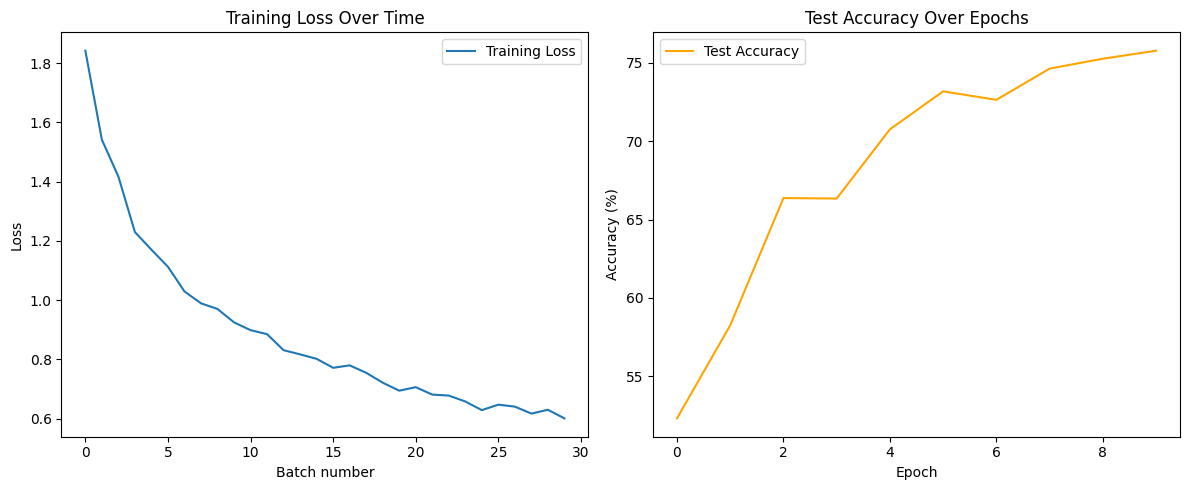

In [ ]:
import matplotlib.pyplot as plt
# 5. 학습 손실 및 정확도 그래프 그리기
plt.figure(figsize=(12, 5))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Batch number')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

# ResNet 18 VS ResNet 34

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from resnet import ResNet18, ResNet34  # ResNet18과 ResNet34를 import

In [ ]:
# 데이터셋 준비 (CIFAR-10)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet 입력 크기에 맞게 조정
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

In [ ]:
train_dataset = datasets.CIFAR10(root="./data", train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root="./data", train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# 모델 생성
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet18 = ResNet18(num_classes=10).to(device)
resnet34 = ResNet34(num_classes=10).to(device)

In [ ]:
# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer_resnet18 = optim.Adam(resnet18.parameters(), lr=0.001)
optimizer_resnet34 = optim.Adam(resnet34.parameters(), lr=0.001)

In [ ]:
# 학습 함수
def train_model(model, optimizer, num_epochs=5):
    train_loss = []
    train_acc = []

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Loss 및 Accuracy 계산
            epoch_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss.append(epoch_loss / len(train_loader))
        train_acc.append(100 * correct / total)

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss[-1]:.4f}, Accuracy: {train_acc[-1]:.2f}%")

    return train_loss, train_acc

In [ ]:
# 테스트 함수
def test_model(model):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")
    return accuracy

In [ ]:
# ResNet-18 학습 및 평가
print("Training ResNet-18...")
loss_resnet18, acc_resnet18 = train_model(resnet18, optimizer_resnet18, num_epochs=5)
test_acc_resnet18 = test_model(resnet18)

# ResNet-34 학습 및 평가
print("\nTraining ResNet-34...")
loss_resnet34, acc_resnet34 = train_model(resnet34, optimizer_resnet34, num_epochs=5)
test_acc_resnet34 = test_model(resnet34)

Training ResNet-18...
Epoch [1/5], Loss: 1.4681, Accuracy: 46.34%
Epoch [2/5], Loss: 0.9174, Accuracy: 67.49%
Epoch [3/5], Loss: 0.6836, Accuracy: 76.01%
Epoch [4/5], Loss: 0.5427, Accuracy: 81.09%
Epoch [5/5], Loss: 0.4428, Accuracy: 84.66%
Test Accuracy: 80.35%

Training ResNet-34...
Epoch [1/5], Loss: 1.5380, Accuracy: 43.19%
Epoch [2/5], Loss: 0.9917, Accuracy: 64.52%
Epoch [3/5], Loss: 0.7285, Accuracy: 74.65%
Epoch [4/5], Loss: 0.5769, Accuracy: 79.92%
Epoch [5/5], Loss: 0.4721, Accuracy: 83.55%
Test Accuracy: 81.74%


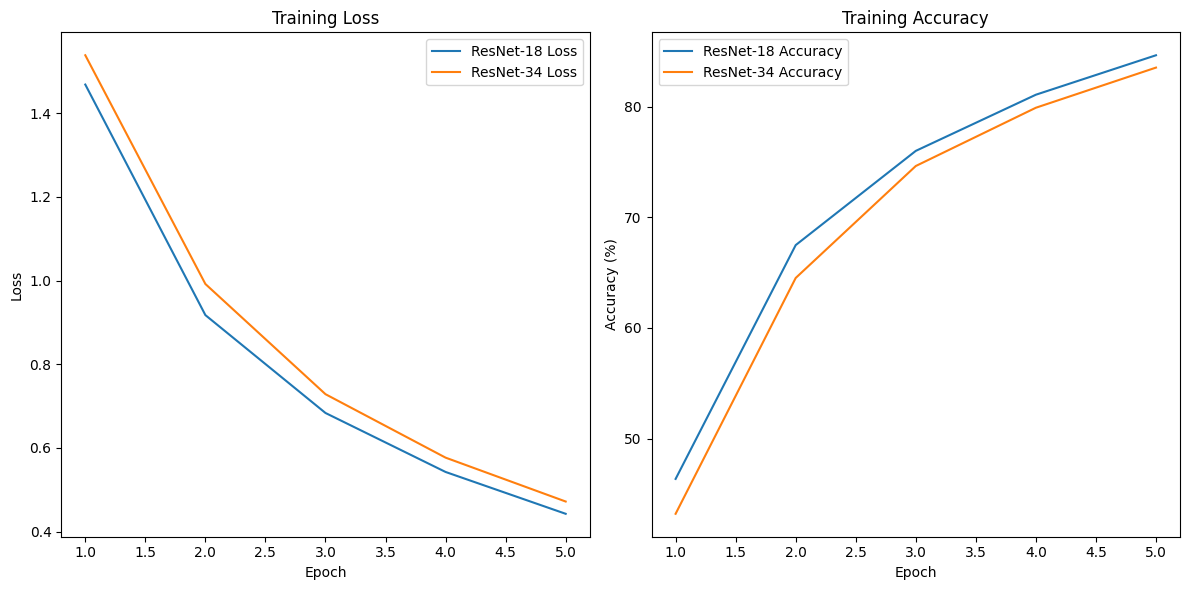

In [ ]:
# Loss 및 Accuracy 비교 시각화
epochs = range(1, 6)

plt.figure(figsize=(12, 6))

# Loss 비교
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_resnet18, label="ResNet-18 Loss")
plt.plot(epochs, loss_resnet34, label="ResNet-34 Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()

# Accuracy 비교
plt.subplot(1, 2, 2)
plt.plot(epochs, acc_resnet18, label="ResNet-18 Accuracy")
plt.plot(epochs, acc_resnet34, label="ResNet-34 Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Training Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

# Summary

In [ ]:
from torchsummary import summary
from resnet import ResNet34, ResNet50  # ResNet34, ResNet50을 정의한 파일 import

# 모델 생성
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet34 = ResNet34(num_classes=10).to(device)
resnet50 = ResNet50(num_classes=10).to(device)


In [ ]:
# 모델 요약 출력
print("ResNet-34 Summary:")
summary(resnet34, input_size=(3, 224, 224))

ResNet-34 Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
            Conv2d-7           [-1, 64, 56, 56]          36,864
       BatchNorm2d-8           [-1, 64, 56, 56]             128
     ResidualBlock-9           [-1, 64, 56, 56]               0
           Conv2d-10           [-1, 64, 56, 56]          36,864
      BatchNorm2d-11           [-1, 64, 56, 56]             128
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
    ResidualBlock-14

In [ ]:
print("\nResNet-50 Summary:")
summary(resnet50, input_size=(3, 224, 224))


ResNet-50 Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5          [-1, 256, 56, 56]          16,384
       BatchNorm2d-6          [-1, 256, 56, 56]             512
            Conv2d-7           [-1, 64, 56, 56]           4,096
       BatchNorm2d-8           [-1, 64, 56, 56]             128
            Conv2d-9           [-1, 64, 56, 56]          36,864
      BatchNorm2d-10           [-1, 64, 56, 56]             128
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
  BottleneckBlock-13          [-1, 256, 56, 56]               0
           Conv2d-1

# ResNet34 VS ResNet50

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from resnet import ResNet34, ResNet50
import matplotlib.pyplot as plt

In [2]:
# 데이터셋 준비 (CIFAR-10)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet 입력 크기에 맞게 조정
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

In [3]:
train_dataset = datasets.CIFAR10(root="./data", train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root="./data", train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


100%|██████████| 170M/170M [00:18<00:00, 9.01MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [4]:
# 모델 준비
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet34 = ResNet34(num_classes=10).to(device)
resnet50 = ResNet50(num_classes=10).to(device)

# 손실 함수와 옵티마이저
criterion = nn.CrossEntropyLoss()
optimizer_resnet34 = optim.Adam(resnet34.parameters(), lr=0.001)
optimizer_resnet50 = optim.Adam(resnet50.parameters(), lr=0.001)

In [5]:
# 학습 함수
def train_model(model, optimizer, num_epochs=10):
    train_loss = []
    train_acc = []
    model.train()

    for epoch in range(num_epochs):
        epoch_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Loss 및 Accuracy 계산
            epoch_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss.append(epoch_loss / len(train_loader))
        train_acc.append(100 * correct / total)

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss[-1]:.4f}, Accuracy: {train_acc[-1]:.2f}%")

    return train_loss, train_acc

In [6]:
# 테스트 함수
def test_model(model):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")
    return accuracy

In [7]:
# ResNet-34 학습
print("Training ResNet-34...")
loss_resnet34, acc_resnet34 = train_model(resnet34, optimizer_resnet34, num_epochs=10)
test_acc_resnet34 = test_model(resnet34)


Training ResNet-34...
Epoch [1/10], Loss: 1.5964, Accuracy: 40.85%
Epoch [2/10], Loss: 0.9732, Accuracy: 65.50%
Epoch [3/10], Loss: 0.7124, Accuracy: 75.14%
Epoch [4/10], Loss: 0.5632, Accuracy: 80.46%
Epoch [5/10], Loss: 0.4625, Accuracy: 84.04%
Epoch [6/10], Loss: 0.3784, Accuracy: 87.01%
Epoch [7/10], Loss: 0.3000, Accuracy: 89.33%
Epoch [8/10], Loss: 0.2330, Accuracy: 91.96%
Epoch [9/10], Loss: 0.1751, Accuracy: 93.89%
Epoch [10/10], Loss: 0.1308, Accuracy: 95.28%
Test Accuracy: 84.31%


In [8]:
# ResNet-50 학습
print("\nTraining ResNet-50...")
loss_resnet50, acc_resnet50 = train_model(resnet50, optimizer_resnet50, num_epochs=10)
test_acc_resnet50 = test_model(resnet50)


Training ResNet-50...
Epoch [1/10], Loss: 1.6809, Accuracy: 38.46%
Epoch [2/10], Loss: 1.1576, Accuracy: 58.29%
Epoch [3/10], Loss: 0.9271, Accuracy: 67.20%
Epoch [4/10], Loss: 0.7688, Accuracy: 72.83%
Epoch [5/10], Loss: 0.6553, Accuracy: 76.97%
Epoch [6/10], Loss: 0.5642, Accuracy: 80.16%
Epoch [7/10], Loss: 0.4831, Accuracy: 83.26%
Epoch [8/10], Loss: 0.4199, Accuracy: 85.35%
Epoch [9/10], Loss: 0.3572, Accuracy: 87.49%
Epoch [10/10], Loss: 0.3088, Accuracy: 89.16%
Test Accuracy: 82.18%


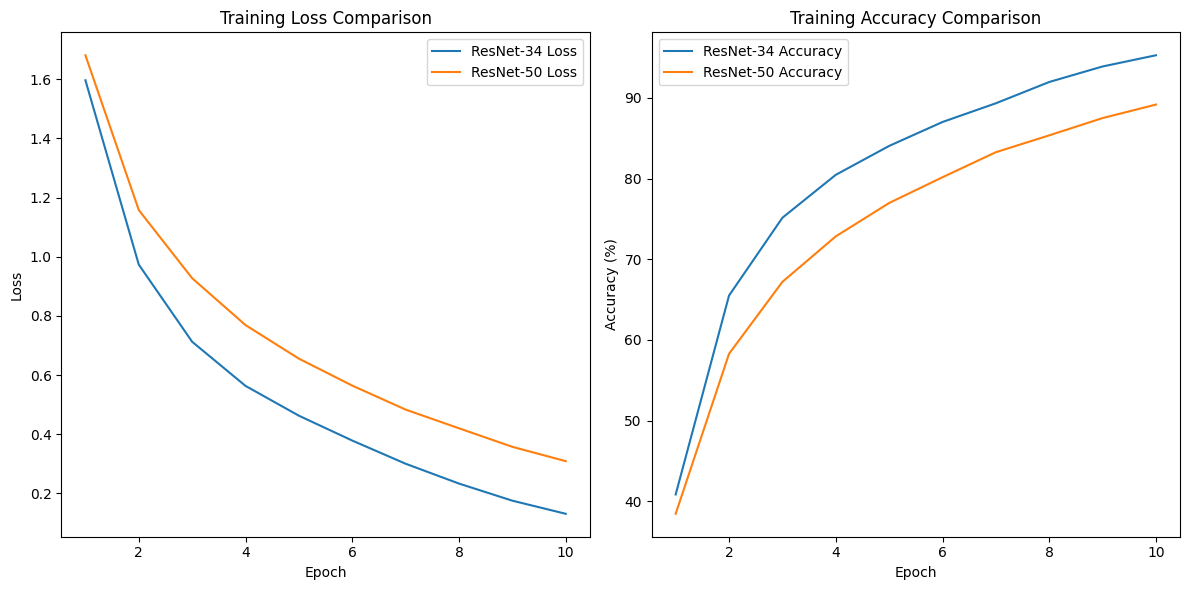

In [10]:

# 결과 시각화
epochs = range(1, 11)

plt.figure(figsize=(12, 6))

# Loss 비교
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_resnet34, label="ResNet-34 Loss")
plt.plot(epochs, loss_resnet50, label="ResNet-50 Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Comparison")
plt.legend()

# Accuracy 비교
plt.subplot(1, 2, 2)
plt.plot(epochs, acc_resnet34, label="ResNet-34 Accuracy")
plt.plot(epochs, acc_resnet50, label="ResNet-50 Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Training Accuracy Comparison")
plt.legend()

plt.tight_layout()
plt.show()